# ABEL collider tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework and required classes

In [1]:
from abel import *
import numpy as np
import scipy.constants as SI
%load_ext autoreload
%autoreload 2

### Define electron linac (PWFA)

In [2]:
# define driver
driver_source = SourceBasic()
driver_source.charge = -2.7e10 * SI.e # [C]
driver_source.energy = 0.15e9 # [eV]
driver_source.rel_energy_spread = 0.01
driver_source.bunch_length = 42e-6 # [m]
driver_source.z_offset = 300e-6 # [m]
driver_source.emit_nx, driver_source.emit_ny = 10e-6, 10e-6 # [m rad]
driver_source.beta_x, driver_source.beta_y = 30e-3, 30e-3 # [m]
driver_source.num_particles = 5000
driver_source.wallplug_efficiency = 0.5

# define driver accelerator
#driver_accel = RFAcceleratorBasic()
driver_accel = RFAcceleratorCLICopti()
driver_accel.nom_energy_gain = 31.1e9 # [eV]
driver_accel.nom_accel_gradient = 10e6 # [V/m]

# define driver complex
driver_complex = DriverComplex()
driver_complex.source = driver_source
driver_complex.rf_accelerator = driver_accel
driver_complex.turnaround = TurnaroundBasic()

# define stage
stage = StageBasic()
stage.driver_source = driver_complex
stage.nom_accel_gradient = 2e9 # [m]
stage.plasma_density = 1e21 # [m^-3]
stage.ramp_beta_mag = 5

# define beam
esource = SourceBasic()
esource.charge = -1e10 * SI.e # [C]
esource.energy = 5e9 # [eV]
esource.rel_energy_spread = 0.01
esource.bunch_length = 18e-6 # [m]
esource.z_offset = -34e-6 # [m]
esource.emit_nx, esource.emit_ny = 160e-6, 0.56e-6 # [m rad]
esource.beta_x = stage.matched_beta_function(esource.energy)
esource.beta_y = esource.beta_x
esource.num_particles = 1000
esource.wallplug_efficiency = 0.1
esource.accel_gradient = 25e6 # [V/m]

# define interstage
interstage = InterstageBasic()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = 0.5 # [T]

# define electron BDS
ebds = BeamDeliverySystemBasic()
ebds.beta_x, ebds.beta_y = 3.3e-3, 0.1e-3 # [m]
ebds.bunch_length = 0.75 * ebds.beta_y

# define electron linac
elinac = PlasmaLinac()
elinac.driver_complex = driver_complex
elinac.source = esource
elinac.stage = stage
elinac.interstage = interstage
elinac.bds = ebds
elinac.num_stages = 16

### Define the positron linac (RF)

In [3]:
# define positron source
psource = SourceBasic()
psource.charge = 4e10 * SI.e # [C]
psource.energy = 60e6 # [eV]
psource.rel_energy_spread = 0.0015
psource.bunch_length = 75e-6 # [m]
psource.emit_nx, psource.emit_ny = 1e-2, 1e-2 # [m rad]
psource.beta_x = 10 # [m]
psource.beta_y = 10 # [m]
psource.num_particles = esource.num_particles
psource.wallplug_efficiency = 0.5
psource.accel_gradient = 25e6 # [V/m]

# injector
pinjector = RFAcceleratorBasic()
pinjector.nom_accel_gradient = 25e6 # [V/m]
pinjector.nom_energy_gain = 2.80e9 # [V/m]

# damping ring
damping_ring = DampingRingBasic()
damping_ring.emit_nx_target = 10e-6 # [m rad]
damping_ring.emit_ny_target = 0.035e-6 # [m rad]

# define RF accelerator
#paccel = RFAcceleratorBasic()
paccel = RFAcceleratorCLICopti()
paccel.nom_accel_gradient = 25e6 # [V/m]

pturnaround = TurnaroundBasic()

# define positron BDS
pbds = BeamDeliverySystemBasic()
pbds.beta_x = 3.3e-3 # [m]
pbds.beta_y = 0.1e-3 # [m]

# define positron linac
plinac = ConventionalLinac()
plinac.rf_injector = pinjector
plinac.damping_ring = damping_ring
plinac.source = psource
plinac.rf_accelerator = paccel
#plinac.turnaround = pturnaround
plinac.bds = pbds

### Define the IP and collider

In [4]:
# define interaction point
#ip = InteractionPointGuineaPig()
ip = InteractionPointBasic()

# define collider (with two different linacs)
collider = Collider()
collider.linac1 = elinac
collider.linac2 = plinac
collider.ip = ip
collider.com_energy = 250e9
collider.energy_asymmetry = 2.5
collider.bunch_separation = 80e-9 # [s]
collider.num_bunches_in_train = 200
collider.rep_rate_trains = 100 # [Hz]

### Perform collider tracking

In [5]:
# track particles
collider.run('collider_example', num_shots=1, overwrite=True);

>> LINAC #1
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  1.0%, ε = 159.9/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  209.6 m) :   E =  24.2 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.2%, ε = 160.1/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  217.1 m) :   E =  24.2 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.2%, ε = 160.1/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  226.7 m) :   E =  43.4 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.1%, ε = 160.1/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  236.6 m) :   E =  43.4 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.1%, ε = 160.1/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  246.3 m) :   E =  62.7 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.1%, ε = 160.1/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  258.2 m) :   E =  62.7 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.1%, ε = 160.1/0.6 mm-mrad
    ... #7  StageBasic #4           (s =  267.8 m) :   E 

In [6]:
collider.print_cost()

-- COSTS -----------------------------------------
-- Construction: 16696 MILCU
   -- Plasma linac: 3020 MILCU
      -- Source: 50 MILCU
      -- Driver complex: 2697 MILCU
         -- Source: 50 MILCU
         -- RF accelerator: 2386 MILCU
            -- Instrumented beamline (29%): 36 MILCU
            -- RF structures (1841x): 254 MILCU
            -- Klystrons (1842x, 15 MW peak, 40 kW avg): 2096 MILCU
         -- Turnaround: 22 MILCU
         -- Civil construction: 239 MILCU
      -- Plasma stages (16x): 31 MILCU
      -- Interstages: 26 MILCU
      -- BDS: 72 MILCU
      -- Civil construction: 144 MILCU
   -- RF linac: 13492 MILCU
      -- Source: 50 MILCU
      -- RF injector: 81 MILCU
         -- Instrumented beamline (29%): 1 MILCU
         -- RF structures (106x): 9 MILCU
         -- Klystrons (107x, 7 MW peak, 23 kW avg): 70 MILCU
      -- Damping ring: 54 MILCU
         -- Ring components: 25 MILCU
         -- Civil construction: 29 MILCU
      -- RF accelerator: 13116 MILC

In [7]:
#collider.print_power()
collider.linac1.driver_complex.wallplug_power()

74998476.07688445

In [8]:
collider.print_emissions()

-- EMISSIONS ------------------------------------
>> Construction emissions (9.6 km): 61 kton CO2e
>> Operation emissions (35.8 TWh):   716 kton CO2e
-------------------------------------------------
>> Total emissions:                 777 kton CO2e
-------------------------------------------------


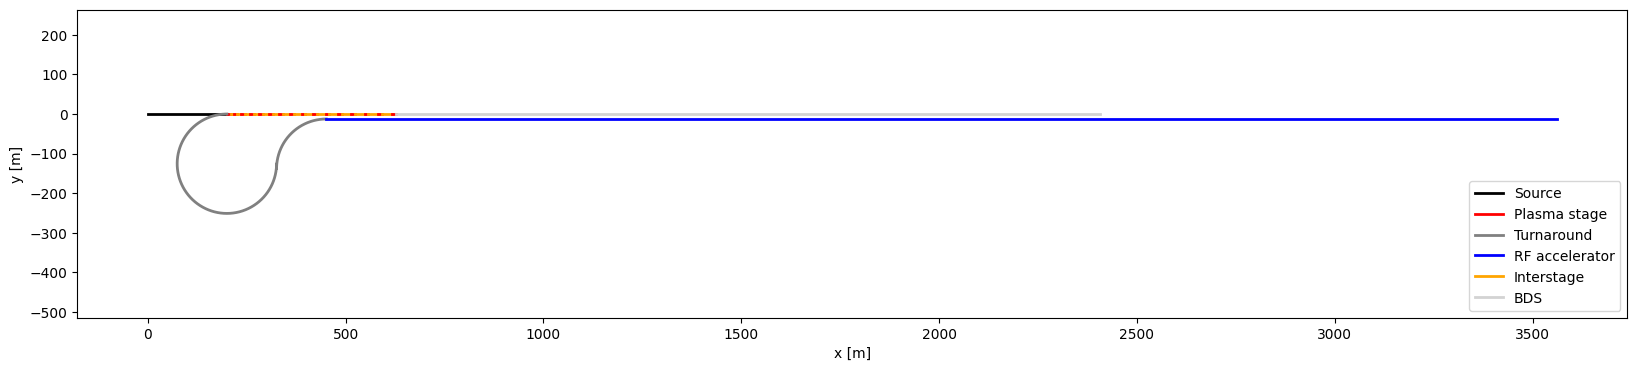

In [9]:
collider.linac1.plot_survey()

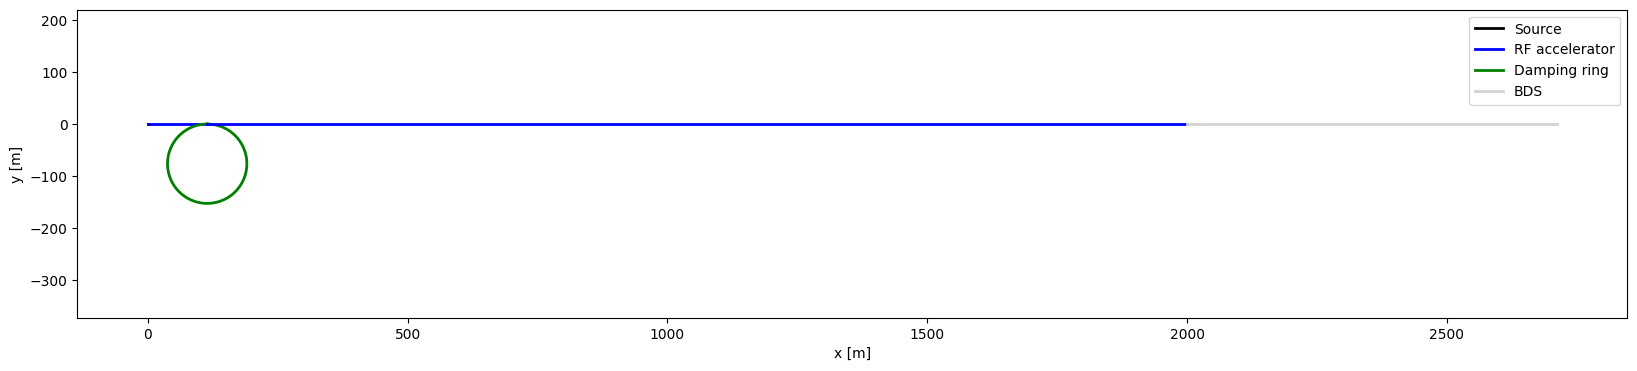

In [10]:
collider.linac2.plot_survey()

In [11]:
#return
collider.optimize('collider_optimization', 
                    parameters=[{'name': 'energy_asymmetry', 'type': 'range', 'bounds': [1.0, 4.0], 'log_scale': True, 'value_type': 'float'}, 
                                {'name': 'linac1.num_stages', 'type': 'range', 'bounds': [5, 50], 'log_scale': True, 'value_type': 'int'},
                               {'name': 'linac2.rf_accelerator.nom_accel_gradient', 'type': 'range', 'bounds': [1e6, 30e6], 'log_scale': True, 'value_type': 'float'},
                               {'name': 'linac1.driver_complex.rf_accelerator.nom_accel_gradient', 'type': 'range', 'bounds': [1e6, 30e6], 'log_scale': True, 'value_type': 'float'}], 
                    merit_fcn=Collider.full_programme_cost,
                    label='Collider cost', 
                    num_shots_per_step=2,
                    num_steps=30, parallel=False, overwrite=True)

/Users/carlal/UiO/Code/venvs/pyvenv/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
[INFO 10-28 19:49:36] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='energy_asymmetry', parameter_type=FLOAT, range=[1.0, 4.0], log_scale=True), RangeParameter(name='linac1.num_stages', parameter_type=INT, range=[5, 50], log_scale=True), RangeParameter(name='linac2.rf_accelerator.nom_accel_gradient', parameter_type=FLOAT, range=[1000000.0, 30000000.0], log_scale=True), RangeParameter(name='lina

>> SHOT 1/60
>> LINAC #1
>> SHOT 1/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  1.0%, ε = 154.3/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  210.6 m) :   E =  26.2 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.2%, ε = 154.4/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  218.4 m) :   E =  26.2 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.2%, ε = 154.4/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  229.0 m) :   E =  47.5 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 154.4/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  239.4 m) :   E =  47.5 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 154.4/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  250.1 m) :   E =  68.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 154.4/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  262.6 m) :   E =  68.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 154.4/0.6 mm-mrad
    ... #7  StageBasic #4      

[INFO 10-28 19:49:38] ax.service.managed_loop: Running optimization trial 2...


Merit function (Collider cost): 2.26e+10
>> energy_asymmetry: 1.74
>> linac1.num_stages: 10
>> linac2.rf_accelerator.nom_accel_gradient: 6.66e+06
>> linac1.driver_complex.rf_accelerator.nom_accel_gradient: 1.25e+06
>> SHOT 3/60
>> LINAC #1
>> SHOT 3/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.1 µm, σE =  1.0%, ε = 158.0/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  202.1 m) :   E =   9.2 GeV, Q = -1.60 nC, σz =  17.1 µm, σE =  0.5%, ε = 158.0/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  206.7 m) :   E =   9.2 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.5%, ε = 158.1/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  208.8 m) :   E =  13.4 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.4%, ε = 158.0/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  214.4 m) :   E =  13.4 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.4%, ε = 158.0/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  216.5 m) :   E =  17.6 GeV, Q = -1.60 nC

[INFO 10-28 19:49:43] ax.service.managed_loop: Running optimization trial 3...


Merit function (Collider cost): 2.19e+10
>> energy_asymmetry: 1.66
>> linac1.num_stages: 48
>> linac2.rf_accelerator.nom_accel_gradient: 1.2e+07
>> linac1.driver_complex.rf_accelerator.nom_accel_gradient: 2.36e+07
>> SHOT 5/60
>> LINAC #1
>> SHOT 5/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  1.0%, ε = 168.5/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  207.9 m) :   E =  20.8 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.3%, ε = 168.3/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  214.8 m) :   E =  20.8 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.3%, ε = 168.3/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  222.7 m) :   E =  36.5 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.1%, ε = 168.3/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  231.8 m) :   E =  36.5 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.1%, ε = 168.3/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  239.7 m) :   E =  52.3 GeV, Q = -1.60 nC,

[INFO 10-28 19:49:47] ax.service.managed_loop: Running optimization trial 4...


Merit function (Collider cost): 1.71e+10
>> energy_asymmetry: 3.7
>> linac1.num_stages: 29
>> linac2.rf_accelerator.nom_accel_gradient: 2.47e+07
>> linac1.driver_complex.rf_accelerator.nom_accel_gradient: 1.29e+06
>> SHOT 7/60
>> LINAC #1
>> SHOT 7/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  1.0%, ε = 157.8/0.5 mm-mrad
    ... #1  StageBasic #1           (s =  205.3 m) :   E =  15.6 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.3%, ε = 157.5/0.5 mm-mrad
    ... #2  InterstageBasic         (s =  211.3 m) :   E =  15.6 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.3%, ε = 157.5/0.5 mm-mrad
    ... #3  StageBasic #2           (s =  216.6 m) :   E =  26.2 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.2%, ε = 157.6/0.5 mm-mrad
    ... #4  InterstageBasic         (s =  224.4 m) :   E =  26.2 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.2%, ε = 157.6/0.5 mm-mrad
    ... #5  StageBasic #3           (s =  229.7 m) :   E =  36.8 GeV, Q = -1.60 nC,

[INFO 10-28 19:49:50] ax.service.managed_loop: Running optimization trial 5...


Merit function (Collider cost): 2.54e+10
>> energy_asymmetry: 1.4
>> linac1.num_stages: 16
>> linac2.rf_accelerator.nom_accel_gradient: 5.24e+06
>> linac1.driver_complex.rf_accelerator.nom_accel_gradient: 2e+07
>> SHOT 9/60
>> LINAC #1
>> SHOT 9/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  1.0%, ε = 159.3/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  208.2 m) :   E =  21.4 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.2%, ε = 159.1/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  215.2 m) :   E =  21.4 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.2%, ε = 159.1/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  223.4 m) :   E =  37.7 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.1%, ε = 159.1/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  232.7 m) :   E =  37.7 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.1%, ε = 159.1/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  240.8 m) :   E =  54.1 GeV, Q = -1.60 nC, σz

[INFO 10-28 19:49:53] ax.service.managed_loop: Running optimization trial 6...


Merit function (Collider cost): 2.45e+10
>> energy_asymmetry: 1.35
>> linac1.num_stages: 10
>> linac2.rf_accelerator.nom_accel_gradient: 1.72e+06
>> linac1.driver_complex.rf_accelerator.nom_accel_gradient: 3.45e+06
>> SHOT 11/60
>> LINAC #1
>> SHOT 11/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  1.0%, ε = 167.6/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  234.6 m) :   E =  74.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 167.8/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  247.6 m) :   E =  74.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 167.8/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  282.2 m) :   E = 143.3 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε = 167.8/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  300.3 m) :   E = 143.3 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε = 167.8/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  334.9 m) :   E = 212.4 GeV, Q = -1.60 

[INFO 10-28 19:49:55] ax.service.managed_loop: Running optimization trial 7...


Merit function (Collider cost): 3.85e+10
>> energy_asymmetry: 2.81
>> linac1.num_stages: 5
>> linac2.rf_accelerator.nom_accel_gradient: 1.72e+06
>> linac1.driver_complex.rf_accelerator.nom_accel_gradient: 2.01e+06
>> SHOT 13/60
>> LINAC #1
>> SHOT 13/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  1.0%, ε = 150.1/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  208.4 m) :   E =  21.8 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.2%, ε = 150.1/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  215.5 m) :   E =  21.8 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.2%, ε = 150.2/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  223.9 m) :   E =  38.6 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.1%, ε = 150.1/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  233.3 m) :   E =  38.6 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.1%, ε = 150.1/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  241.7 m) :   E =  55.4 GeV, Q = -1.60 n


KeyboardInterrupt



### Plot the wakefield structure

In [ ]:
# plot wakefield
elinac.stage.plot_wake()

### Plot the beam evolution in the linac

In [ ]:
# plot beam evolution and linac survey
elinac.plot_survey()
elinac.plot_evolution(use_stage_nums=False)

In [ ]:
elinac.plot_waterfalls()

### Plot the collider luminosity

In [ ]:
# plot luminosity
collider.plot_luminosity()

# plot luminosity per power
collider.plot_luminosity_per_power()